# Exploring and Analyzing MrBeast YouTube Comments



YouTube is not only a popular social media platform but is also the second largest search engine. Consequently, promotional content is a main staple on YouTube, reaching a very large audience. Videos are accompanied by a comments section which allow viewers to engage with content creators or other fans. With this level of engagement, companies flock to larger channels to offer sponsorships to promote their products within a video in exchange for a variety of benefits.   

Of the many YouTube content creators, MrBeast is known for his unique expenditures and charitable acts, a lot of which are sponsored by companies which provide the capital. I am interested in analyzing YouTube comments on the MrBeast channel since his content is not controversial and I am curious to see if the comments are overwhelmingly positive as rumored. I especially want to see which video comments section is the most positive and negative. This can explain popularity of videos apart from view or like counts. Similarly, I want to see the most defining words of the channel. MrBeast often films with his good friends so perhaps their names will be in this list.

Moreover, to get the comments, I have to build and clean the dataset from scratch which is something I want to challenge myself to do. I can use this exposure to scraping so I can improve existing datasets or create new datasets that could address business problems. 



#### Import Libraries

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

!pip install emoji
from emoji import UNICODE_EMOJI

!pip install vaderSentiment
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

!pip install TextBlob
from textblob import TextBlob
from textblob import Word

     |████████████████████████████████| 51kB 2.8MB/s 
  Created wheel for emoji: filename=emoji-0.6.0-cp36-none-any.whl size=49717 sha256=507392f70854b4005fbbcef6d4b81f64454c3609fea1fc978c350cabd550ce57
  Stored in directory: /root/.cache/pip/wheels/46/2c/8b/9dcf5216ca68e14e0320e283692dce8ae321cdc01e73e17796
Successfully built emoji
     |████████████████████████████████| 133kB 4.2MB/s 


In [ ]:
file_mrbeast = 'MrBeast_comments.csv'
df = pd.read_csv(file_mrbeast)
df.head()

,Unnamed: 0,comment,comment_id,author_url,author_name,reply_count,like_count,date,vidid,total_reply_counts,vid_title,just_date
0,0,"""I'm sorry, international fans""\n\n*Cries in P...",UgxTQx4UK1GxX8csGQN4AaABAg,http://www.youtube.com/channel/UCRvvUJye_0IPDE...,Allona Shanley Magpantay,0,0,2021-01-13 16:59:52+00:00,dg2Ag3e8W-Q,0,I Opened A Restaurant That Pays You To Eat At It,2021-01-13
1,1,Relatable,UgxU3cNgqkyGMDAuXxJ4AaABAg,http://www.youtube.com/channel/UC8FTumc39Z00Vn...,Sagar Gwal,0,0,2021-01-13 16:59:46+00:00,LeYsRMZFUq0,0,"I Gave People $1,000,000 But ONLY 1 Minute To ...",2021-01-13
2,2,How do you Gus love that crap,UgyUaDvKrt8ioZ7QTbh4AaABAg,http://www.youtube.com/channel/UCnF6pvaO6iYSnY...,Noah Rodriguez,0,0,2021-01-13 16:59:43+00:00,A-vX1AGBGsc,0,I Went Back To 1st Grade For A Day,2021-01-13
3,3,I wouldn’t be surprised if MrBeast became one ...,UgwBA9pqqOVRBKXl17B4AaABAg,http://www.youtube.com/channel/UCOQ-Z0f0gWPtGQ...,TheFlaaa,0,0,2021-01-13 16:59:43+00:00,5Fg9oZk-5uA,0,I Bought Everything In 5 Stores,2021-01-13
4,4,Chandler:eats a rose,UgxhD7F8V6WUiYXvA5F4AaABAg,http://www.youtube.com/channel/UCZocmKEhNiRotw...,Emilija Mikuckyte,0,0,2021-01-13 16:59:43+00:00,i6OUv48w1bk,0,"Surprising My Girlfriend With 100,000 Roses Fo...",2021-01-13


In [ ]:
# Remove comments by the author of the video i.e. MrBeast
comments = df.query('author_name != "MrBeast"')
comments.head()

,Unnamed: 0,comment,comment_id,author_url,author_name,reply_count,like_count,date,vidid,total_reply_counts,vid_title,just_date
0,0,"""I'm sorry, international fans""\n\n*Cries in P...",UgxTQx4UK1GxX8csGQN4AaABAg,http://www.youtube.com/channel/UCRvvUJye_0IPDE...,Allona Shanley Magpantay,0,0,2021-01-13 16:59:52+00:00,dg2Ag3e8W-Q,0,I Opened A Restaurant That Pays You To Eat At It,2021-01-13
1,1,Relatable,UgxU3cNgqkyGMDAuXxJ4AaABAg,http://www.youtube.com/channel/UC8FTumc39Z00Vn...,Sagar Gwal,0,0,2021-01-13 16:59:46+00:00,LeYsRMZFUq0,0,"I Gave People $1,000,000 But ONLY 1 Minute To ...",2021-01-13
2,2,How do you Gus love that crap,UgyUaDvKrt8ioZ7QTbh4AaABAg,http://www.youtube.com/channel/UCnF6pvaO6iYSnY...,Noah Rodriguez,0,0,2021-01-13 16:59:43+00:00,A-vX1AGBGsc,0,I Went Back To 1st Grade For A Day,2021-01-13
3,3,I wouldn’t be surprised if MrBeast became one ...,UgwBA9pqqOVRBKXl17B4AaABAg,http://www.youtube.com/channel/UCOQ-Z0f0gWPtGQ...,TheFlaaa,0,0,2021-01-13 16:59:43+00:00,5Fg9oZk-5uA,0,I Bought Everything In 5 Stores,2021-01-13
4,4,Chandler:eats a rose,UgxhD7F8V6WUiYXvA5F4AaABAg,http://www.youtube.com/channel/UCZocmKEhNiRotw...,Emilija Mikuckyte,0,0,2021-01-13 16:59:43+00:00,i6OUv48w1bk,0,"Surprising My Girlfriend With 100,000 Roses Fo...",2021-01-13


In [ ]:
def removeNewline(comment):
  return comment.str.replace("\n", " ")

In [ ]:
comments['comment'] = removeNewline(comments['comment'])

In [ ]:
comments.head()

,Unnamed: 0,comment,comment_id,author_url,author_name,reply_count,like_count,date,vidid,total_reply_counts,vid_title,just_date
0,0,"""I'm sorry, international fans"" *Cries in Phi...",UgxTQx4UK1GxX8csGQN4AaABAg,http://www.youtube.com/channel/UCRvvUJye_0IPDE...,Allona Shanley Magpantay,0,0,2021-01-13 16:59:52+00:00,dg2Ag3e8W-Q,0,I Opened A Restaurant That Pays You To Eat At It,2021-01-13
1,1,Relatable,UgxU3cNgqkyGMDAuXxJ4AaABAg,http://www.youtube.com/channel/UC8FTumc39Z00Vn...,Sagar Gwal,0,0,2021-01-13 16:59:46+00:00,LeYsRMZFUq0,0,"I Gave People $1,000,000 But ONLY 1 Minute To ...",2021-01-13
2,2,How do you Gus love that crap,UgyUaDvKrt8ioZ7QTbh4AaABAg,http://www.youtube.com/channel/UCnF6pvaO6iYSnY...,Noah Rodriguez,0,0,2021-01-13 16:59:43+00:00,A-vX1AGBGsc,0,I Went Back To 1st Grade For A Day,2021-01-13
3,3,I wouldn’t be surprised if MrBeast became one ...,UgwBA9pqqOVRBKXl17B4AaABAg,http://www.youtube.com/channel/UCOQ-Z0f0gWPtGQ...,TheFlaaa,0,0,2021-01-13 16:59:43+00:00,5Fg9oZk-5uA,0,I Bought Everything In 5 Stores,2021-01-13
4,4,Chandler:eats a rose,UgxhD7F8V6WUiYXvA5F4AaABAg,http://www.youtube.com/channel/UCZocmKEhNiRotw...,Emilija Mikuckyte,0,0,2021-01-13 16:59:43+00:00,i6OUv48w1bk,0,"Surprising My Girlfriend With 100,000 Roses Fo...",2021-01-13


#### Vader Sentiments

VADER (Valence Aware Dictionary for Sentiment Reasoning) is a model that is sensitive to both polarity and intensity of emotion. It relies on a dictionary that maps lexical feactures to emotion intensities as sentiment scores. The sum of the intensities of each word in text is the sentiment score. Here, I am using polarity classification since I only care if the text expresses a positive or negative opinion but not the degree of how positive or negative the text is. VADER can also tell something like "did not love" as negative when compared to just "love."

In [ ]:
sentiment = SentimentIntensityAnalyzer()
sentiment.polarity_scores(comments.comment[0])
comments['vader_sentiment'] = comments.comment.apply(lambda x: sentiment.polarity_scores(x))
comments['vader_neg_sentiment'] = comments.vader_sentiment.apply(lambda x: x['neg'])
comments['vader_pos_sentiment'] = comments.vader_sentiment.apply(lambda x: x['pos'])
comments['vader_neu_sentiment'] = comments.vader_sentiment.apply(lambda x: x['neu'])
comments['vader_comp_sentiment'] = comments.vader_sentiment.apply(lambda x: x['compound'])

Positive sentiment

In [ ]:
comments.sort_values(by=['vader_comp_sentiment'], ascending=False)[['comment']].head()

,comment
5567,This made my day 😊😊😊😊😊😊😊😊😊☺️☺️☺️😊😊😊😊😊😊😊😊😊😊😊😊😊😊...
1325,When the guy go to the table and he jumped and...
4082,❤️❤️❤️😍😍😍😍😍😍😍😍😍😍😍😍😍😍😍😍😍😍😍😍😍😍😍😍😍😍❤️❤️❤️❤️❤️❤️❤️...
6797,Im from Philippines i hipe mr beast visit me h...
6555,😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😔😂😂😂😂😂


Neutral sentiment

In [ ]:
vader_neutral = comments.query('vader_comp_sentiment == 0').rename(columns={"comment": "vader_comment"})[['vader_comment']].reset_index(drop=True)
vader_neutral

,vader_comment
0,Relatable
1,Chandler:eats a rose
2,I SAW MR.BEAST GET TO 51 MILLION!
3,Buy a franchise
4,Iv heard people say you shouldnt donate to sal...
...,...
5279,Is it just me who was watching the football in...
5280,How do you have so much money
5281,Elise Stefanik
5282,Ryan did the spoon flip


Negative sentiment

In [ ]:
comments.sort_values(by=['vader_comp_sentiment'], ascending=True)[['comment']].head()

,comment
8743,😥😥😥😥😥😥😢😢😢😢😢😢😢😢😢😢😢😱😱😱
3022,PEWDIEDIE AAAAAAAAH 💥💥💥💥💥💥💥💥💥💥💥💥💥💥💥💥💥💥💥💥!!!!!!...
8511,So sad for chandler 😭😭😭😭😭😭😭😭
5617,My reaction: *H* 😄😥😫😓🤤😝😤😞😖😲🤑😵🥴🤯😨😭😱🥺 *Fricc...
2493,I feel so bad for chandler 😢😢😢😢😢😢


This is more like pity... Let's try something else.

#### Textblob Sentiments

Calculates the sentiment polarity as a float that lies in the range [-1,1], where 1 is positive sentiment and -1 is negative sentiment. Textblob disregards words that it does not have any aquaintance with. Instead, it will consider words and expressions that it can determine extremity.

In [ ]:
comments['textblob_polarity'] = comments['comment'].map(lambda text: TextBlob(text).sentiment.polarity)
comments['comment_len'] = comments['comment'].astype(str).apply(len)
comments['word_count'] = comments['comment'].apply(lambda x: len(str(x).split()))

Positive sentiment

In [ ]:
comments.sort_values(by=['textblob_polarity'], ascending=False)[['comment', 'textblob_polarity']].head()

,comment,textblob_polarity
8705,Teacher: THE BEST JOB IN TH WORLD IS WHAT? ST...,1.0
6961,4:05 he says microwaves are the best but look ...,1.0
2835,Best channel ever,1.0
3163,You have a lot of fans from Croatia <3,1.0
4336,Help me. Please donate me some money. Perfect ...,1.0


Neutral sentiment

In [ ]:
textblob_neutral = comments.query('textblob_polarity == 0').rename(columns={"comment": "textblob_comment"})[['textblob_comment']].reset_index(drop=True)
textblob_neutral

,textblob_comment
0,Relatable
1,I SAW MR.BEAST GET TO 51 MILLION!
2,Buy a franchise
3,Iv heard people say you shouldnt donate to sal...
4,*what if he goes bankrupt*
...,...
6770,Elise Stefanik
6771,Ryan did the spoon flip
6772,why am i just now seeing this on my recommended
6773,Chan Chan's Dog


Negative sentiment

In [ ]:
comments.sort_values(by=['textblob_polarity'], ascending=True)[['comment', 'textblob_polarity']].head()

,comment,textblob_polarity
6674,this is insane aaa,-1.0
6869,How dare you guys use lightning McQueens cars ...,-1.0
6858,im getting insane watching,-1.0
1074,"Thats insane man, he now has cameramans. Becau...",-1.0
3905,Its terrifying,-1.0


Much better than VADER since the scaling is finer.

In [ ]:
pd.set_option('display.max_colwidth', None)
comments.sort_values(by=['like_count'], ascending=False)[['comment']].head(10)

,comment
4843,*The only thing bigger than this man's wallet is his heart.*
8250,In 2045= Mr beast: “Today me and the boy’s are going to destroy the Statue of Liberty and surprise America with a new one!”
9657,Mr. Beast: walks into a store Cashier: shi-
9922,"""But thank god they have a clearance section."" ""Can we pay full price?"" "" *shut up, please.* """
5764,When you realize MrBeast does more than the government
6968,"This dude is such a selfless person, he puts his money that he receives back into the community. Incredible."
7105,Mr. Beast: *Enter the store* Manager: This is gonna be a lot of money boi. OH YES! HA HA HA
3963,Mrbeast: buying everything in a store The people who need to scan everything: Shi- 😐
3949,LEGENDS are born with an explosion
11163,MrBeast: “I’m actually here to buy the lot again” Manager: “Again?” MrBeast: *AGAIN*


#### EDA 

Comparing the two model distributions

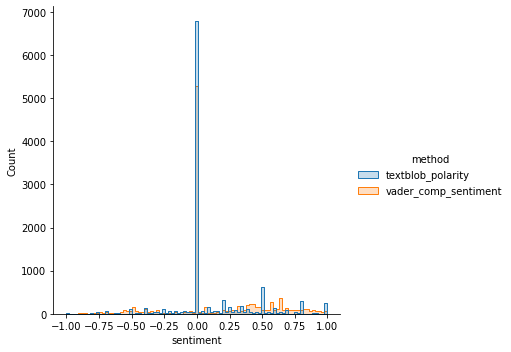

In [ ]:
sub = comments[['comment', 'textblob_polarity', 'vader_comp_sentiment', 'just_date', 'vidid', 'comment_len', 'word_count']]
pol_hist = sub.melt(id_vars=['comment', 'just_date', 'vidid', 'comment_len', 'word_count'], value_vars=['textblob_polarity', 'vader_comp_sentiment'], var_name='method', value_name='sentiment')
sns.displot(pol_hist, x="sentiment", hue="method", element="step")
plt.show()

Plot the distributions for length of each comment and the number of words in each comment

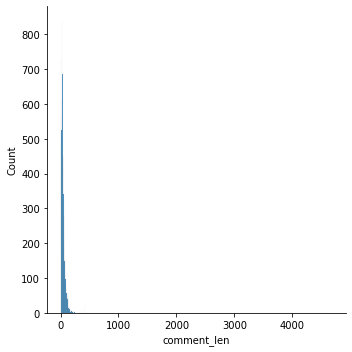

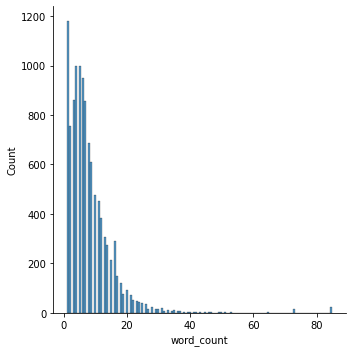

In [ ]:
only_textblob = pol_hist.query('method == "textblob_polarity"')

sns.displot(only_textblob, x="comment_len")
sns.displot(only_textblob, x="word_count")
plt.show()

Most liked comments

In [ ]:
pd.set_option('display.max_colwidth', None)
comments.sort_values(by=['like_count'], ascending=False)[['comment']].head(15)

,comment
4843,*The only thing bigger than this man's wallet is his heart.*
8250,In 2045= Mr beast: “Today me and the boy’s are going to destroy the Statue of Liberty and surprise America with a new one!”
9657,Mr. Beast: walks into a store Cashier: shi-
9922,"""But thank god they have a clearance section."" ""Can we pay full price?"" "" *shut up, please.* """
5764,When you realize MrBeast does more than the government
6968,"This dude is such a selfless person, he puts his money that he receives back into the community. Incredible."
7105,Mr. Beast: *Enter the store* Manager: This is gonna be a lot of money boi. OH YES! HA HA HA
3963,Mrbeast: buying everything in a store The people who need to scan everything: Shi- 😐
3949,LEGENDS are born with an explosion
11163,MrBeast: “I’m actually here to buy the lot again” Manager: “Again?” MrBeast: *AGAIN*


Sentiment per video

Since there are so many videos, I will just show the more recent videos since the x axis scaling won't keep up.

In [ ]:
comments.groupby('vid_title').mean()[['textblob_polarity']].sort_values(by=['textblob_polarity'], ascending=True)

# Trim the data to just some of my favorite videos
  # I Opened A Restaurant That Pays You To Eat At It
  # I Bought Everything In 5 Stores
  # If You Click This Video I'll Give My Friend .001$
  # I Opened A Free Car Dealership
  # $200,000 Youtuber Battle Royale
  # I Ate A $70,000 Golden Pizza
shortList = ['I Opened A Restaurant That Pays You To Eat At It','I Bought Everything In 5 Stores',"If You Click This Video I'll Give My Friend .001$",'I Opened A Free Car Dealership','$200,000 Youtuber Battle Royale','I Ate A $70,000 Golden Pizza']
tempData = comments.loc[comments.vid_title.isin(shortList)]

[Text(0, 0, 'I Opened A Restaurant That Pays You To Eat At It'),
 Text(0, 0, 'I Bought Everything In 5 Stores'),
 Text(0, 0, "If You Click This Video I'll Give My Friend .001$"),
 Text(0, 0, 'I Opened A Free Car Dealership'),
 Text(0, 0, '$200,000 Youtuber Battle Royale'),
 Text(0, 0, 'I Ate A $70,000 Golden Pizza')]

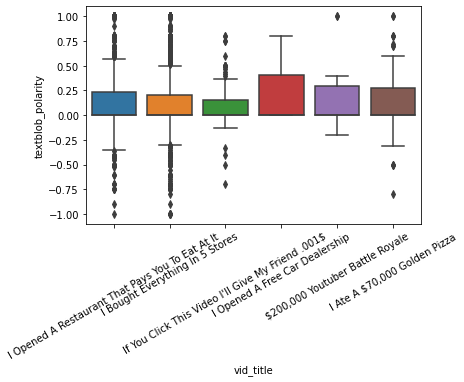

In [ ]:
ax = sns.boxplot(x="vid_title", y="textblob_polarity", data = tempData)
ax.set_xticklabels(ax.get_xticklabels(),rotation=30)

Everyone loves a free car.

Sentiments over time

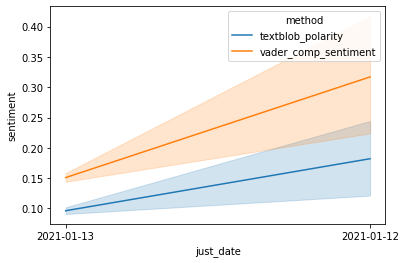

In [ ]:
sns.lineplot(x="just_date", y="sentiment", hue="method", data=pol_hist)
plt.show()

Wonderful! This channel is only growing.

#### K Means Clustering of Comments

We will now try to find clusters in this unlabelled data to explain the realtionship between comments. We calculate distances between points to group similar data together. We fix a K, also known as the number of centroids or clusters. We then allocate every data point to the nearest cluster. The mean in the algorithm name literally refers to the average which leads us to the centroid. If I choose K = 2 and the comments are truly polarized, perhaps the channel's comment community isn't very positive. 

When working with text data, especially comments, I will need to remove emojis or replace them with their literal text definition. I will just remove them here. Similarly, I will need to remove punctuation, stopwords and tokenize the remaining words. Here, lemmatization will convert a word to its base form without taking away meaning as opposed to stemming. The result will then be vectorized, returning a list.

In [ ]:
from sklearn.feature_extraction import text
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from nltk.tokenize import RegexpTokenizer
from nltk.stem.snowball import SnowballStemmer
%matplotlib inline

In [ ]:
import string
import emoji

def removeEmojis(text):
  allComments = [str for str in text]
  allEmojis = [char for char in allComments if char in emoji.UNICODE_EMOJI] 
  cleanedText = ' '.join([str for str in text.split() if not any(i in str for i in allEmojis)])
  return cleanedText

In [ ]:
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import RegexpTokenizer
nltk.download('stopwords')
nltk.download('wordnet')

def preprocessText(text):
  lemmatizer = WordNetLemmatizer()
  withoutPunctuation = [char for char in text if char not in string.punctuation]
  withoutPunctuation = ''.join([i for i in withoutPunctuation if not i.isdigit()])
  withoutPunctuation = [word.lower() for word in withoutPunctuation.split() if word not in stopwords.words('english')]
  temp = [lemmatizer.lemmatize(word) for word in withoutPunctuation]

  joined = ' '.join(temp)

  # Remove emojis 
  joined = removeEmojis(joined)
  return joined.split()

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


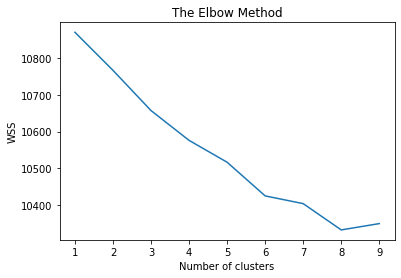

In [ ]:
from sklearn.feature_extraction import text
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans

desc = comments['comment'].values 
vectorizer4 = TfidfVectorizer(analyzer = preprocessText, stop_words=stopwords.words('english'), ngram_range=(1,3))
X4 = vectorizer4.fit_transform(desc)
words = vectorizer4.get_feature_names()

WSS = []
for i in range(1,10):
    kmeans = KMeans(n_clusters=i,init='k-means++',max_iter=300,n_init=10,random_state=42)
    kmeans.fit(X4)
    WSS.append(kmeans.inertia_)
plt.plot(range(1,10),WSS)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WSS')
plt.show()

K = 8 is the best. I can't exactly use k = 2 so let's see if we can work with 8 even if it is more complex.

To find the ideal number of clusters, we can use the elbow method. We fit a range of values for K. Then we look for an elbow (point of inflection) in the line plot of WSS vs number of clusters. The location of this elbow is an indicator of the most appropriate number of clusters.

The elbow method looks at the total WSS as a function of the clusters. The WSS or the within-cluster sum of square measures the compactness of the clustering which should be as small as possible here so that is why we look for the inflection point. 

In [ ]:
kmeans = KMeans(n_clusters = 8, n_init = 20, n_jobs = 1)
kmeans.fit(X4)
common_words = kmeans.cluster_centers_.argsort()[:,-1:-26:-1]
for num, centroid in enumerate(common_words):
    print(str(num) + ' : ' + ', '.join(words[word] for word in centroid))

0 : mrbeast, money, u, the, million, chandler, you, im, this, wow, give, who, get, buy, please, he, good, guy, one, man, watching, fan, people, what, jimmy
1 : beast, mr, i, love, president, best, u, money, buy, give, get, please, world, me, im, one, hey, good, want, this, you, person, need, fan, bought
2 : hi, dad, mrbeast, mr, beast, jimmy, bro, philippine, fan, im, katie, georgie, lazar, squirtle, future, let, karl, i’m, india, come, gate, garden, garett, generation, garret
3 : i, love, mrbeast, want, get, would, video, need, wish, think, one, subscribed, see, money, people, chandler, dont, can, india, feel, hope, could, really, know, please
4 : chris, poor, chandler, i, karl, im, u, jimmy, is, love, moisturize, doe, hand, the, it, think, looking, shirt, did, life, literally, belle, delphine, always, else
5 : lol, i, got, mil, million, vid, imagine, would, chandler, guy, sub, car, im, get, mrbeast, free, people, year, omg, didnt, first, still, funny, why, used
6 : bald, gang, tyler,

Notable observations:

The fifth cluster has the names of people in the group <br>
The first cluster has people begging for money <br>
In most of the clusters, 'sub' shows up which for a while was part of the "subcribe to Pewdiepie" campaign. Now, it is just bot accounts asking people to subscribe to a channel. <br>
Earlier, when I removed author name MrBeast this also took out any spam accounts that pretended to have the same name as the actual MrBeast. However, there are plenty of other names with links as actual comments. But when I removed punctuation, those comments only left behind 'lol', 'omg' and 'sub'. <br>
Since I use lematization instead of stemming, the clusters have words that only differ by tense.

#### Most Defining Words

In [ ]:
!pip install scattertext
import spacy.cli
spacy.cli.download("en_core_web_lg")
import scattertext as st

nlp = spacy.load('en_core_web_lg')
corpus = st.CorpusFromPandas(only_textblob, category_col='vidid', text_col='comment', nlp=nlp).build()
# terms that differentiate text from background text 
print(list(corpus.get_scaled_f_scores_vs_background().index[:20]))

     |████████████████████████████████| 7.3MB 4.2MB/s 
  Created wheel for flashtext: filename=flashtext-2.7-py2.py3-none-any.whl size=9299 sha256=7114eb7f12b3eb10c9ed5cd51214b716c00c7c6391c4fc55d55eb65fc96c12f9
  Stored in directory: /root/.cache/pip/wheels/37/db/d7/fe74f7cb8e5c3afed90fe6f4967c933a6f13d81ab6b3d3128c
Successfully built flashtext
✔ Download and installation successful
You can now load the model via spacy.load('en_core_web_lg')
['mrbeast', 'bruh', 'pewdiepie', 'youtuber', 'minecraft', 'matterego', 'youtubers', 'iphone', 'fortnite', 'roblox', 'tiktokers', 'morgz', 'subbed', 'korone', 'subed', 'covid', 'carryminati', 'robux', 'nogla', 'chanler']


I should check for spelling but here we can tell that some of these defining words were obvious. Most of the other words also make sense.